# Plotting SSA and SOM

Alex Koiter

## Load Libraries

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Loading required package: viridisLite

## Load data

In [ ]:
psa <- read.csv(here::here("./notebooks/PSA_data.csv")) %>%
  rename(site = Site) %>%
  select(site, sample_number, sampling_design, dx_50, specific_surface_area) %>%
  filter(sampling_design != "Fine scale") %>%
  mutate(sampling_design = fct_relevel(sampling_design, "Grid" , "Transect","Likely to erode")) %>%
  mutate(sig_letter = case_when(site == "Agriculture" ~ "a",
                                site == "Forest" ~ "b")) %>%
  group_by(site, sampling_design) %>%
  mutate(ymax = max(specific_surface_area)+60)

om <- read.csv(here::here("./notebooks/OM_data.csv")) %>%
  rename(site = Site, sampling_design = Sampling_Design, sample_number = Sample_Number) %>%
  select(OM, site, sampling_design, sample_number) %>%
  filter(sampling_design != "Fine scale") %>%
  mutate(site = recode(site, Agricultural = "Agriculture")) %>%
  mutate(sampling_design = fct_relevel(sampling_design, "Grid" , "Transect","Likely to erode")) %>%
  mutate(sig_letter = case_when(site == "Agriculture" ~ "a",
                                site == "Forest" ~ "b")) %>%
  group_by(site, sampling_design) %>%
  mutate(ymax = max(OM)+1)


## Stats

In [ ]:
wilcox.test(specific_surface_area ~ site, data = filter(psa, sampling_design == "Grid")) 



    Wilcoxon rank sum test with continuity correction

data:  specific_surface_area by site
W = 2450, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


    Wilcoxon rank sum exact test

data:  specific_surface_area by site
W = 196, p-value = 4.985e-08
alternative hypothesis: true location shift is not equal to 0


    Wilcoxon rank sum exact test

data:  specific_surface_area by site
W = 64, p-value = 0.0001554
alternative hypothesis: true location shift is not equal to 0


    Wilcoxon rank sum exact test

data:  OM by site
W = 779, p-value = 0.002526
alternative hypothesis: true location shift is not equal to 0


    Wilcoxon rank sum exact test

data:  OM by site
W = 49, p-value = 0.02412
alternative hypothesis: true location shift is not equal to 0


    Wilcoxon rank sum exact test

data:  OM by site
W = 64, p-value = 0.0001554
alternative hypothesis: true location shift is not equal to 0

## Plotting

Adding missing grouping variables: `site`

Adding missing grouping variables: `site`

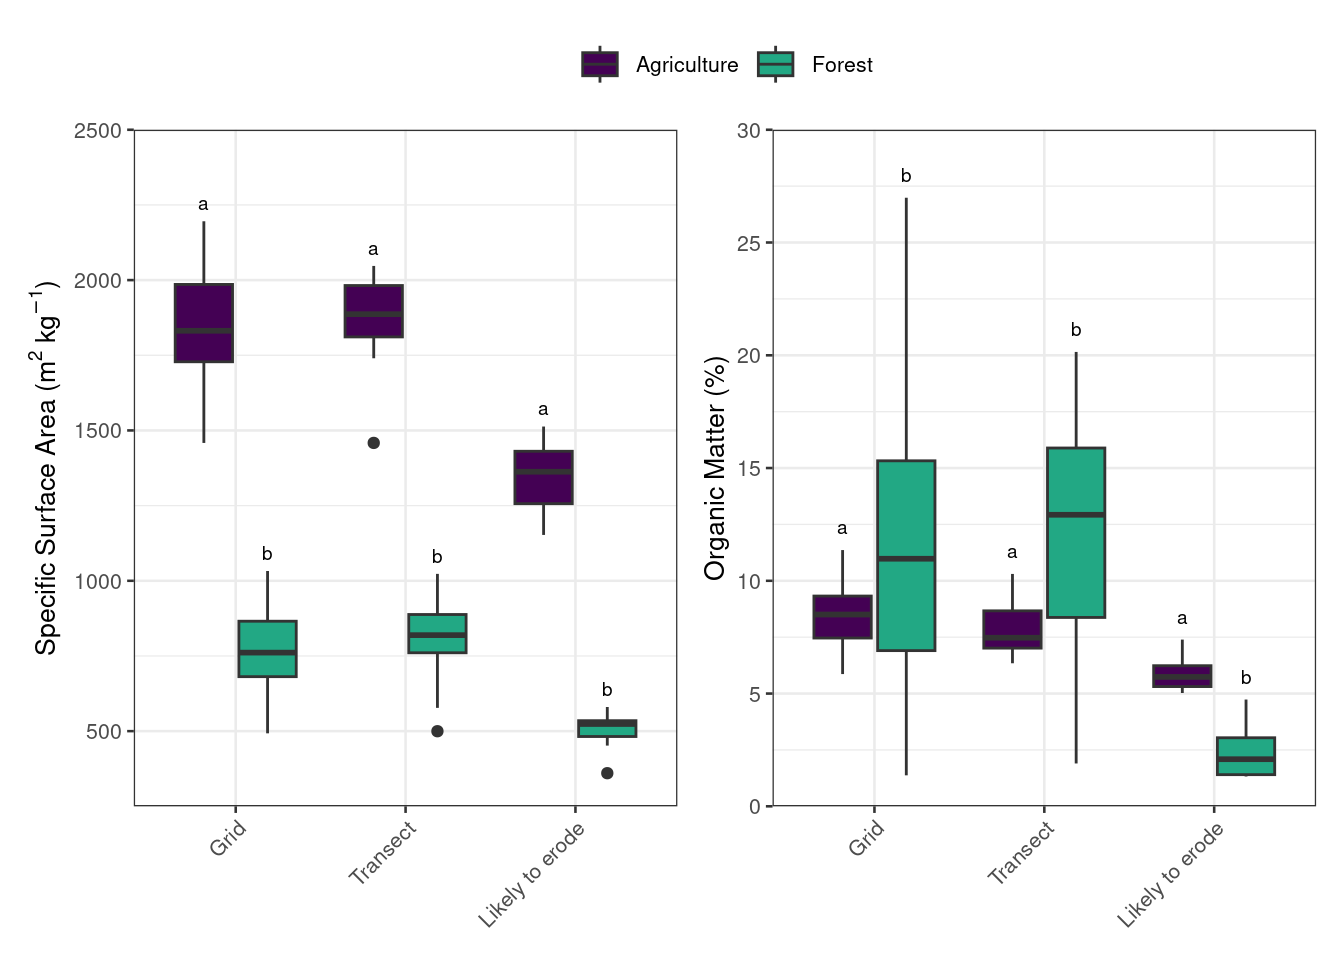

In [ ]:
p1 <- ggplot(data = psa, aes(x = sampling_design, y = specific_surface_area, fill = site)) +
  geom_boxplot() +
    geom_text(data = select(psa, sampling_design, ymax, sig_letter) |> distinct(), 
            position = position_dodge(width = 0.75), aes(y = ymax, label = sig_letter, group = site), size = 2.5) +
  theme_bw(base_size = 10) +
  scale_y_continuous(expand =c(0,0), limits = c(250, 2500), breaks = seq(0, 2500, 500)) +
  labs(y = expression(paste("Specific Surface Area (", m^2*~kg^{-1}, ")"))) +
  theme(axis.title.x = element_blank(),
        legend.title = element_blank(),
        axis.text.x = element_text(angle = 45, hjust=1),
        legend.position = "none") +
  scale_fill_viridis(discrete = TRUE, begin = 0, end = 0.6)


## Summary

In [ ]:
om %>%
  full_join(psa) %>%
  pivot_longer(cols = c(specific_surface_area, OM, dx_50), names_to = "property", values_to = "value") %>%
  group_by(sampling_design, site, property) %>%
  summarise(avg = round(mean(value), 1),
            sd = round(sd(value), 1))


Joining with `by = join_by(site, sampling_design, sample_number, sig_letter,
ymax)`
`summarise()` has grouped output by 'sampling_design', 'site'. You can override
using the `.groups` argument.

# A tibble: 18 × 5
# Groups:   sampling_design, site [6]
   sampling_design site        property                avg    sd
   <fct>           <chr>       <chr>                 <dbl> <dbl>
 1 Grid            Agriculture OM                       NA    NA
 2 Grid            Agriculture dx_50                    NA    NA
 3 Grid            Agriculture specific_surface_area    NA    NA
 4 Grid            Forest      OM                       NA    NA
 5 Grid            Forest      dx_50                    NA    NA
 6 Grid            Forest      specific_surface_area    NA    NA
 7 Transect        Agriculture OM                       NA    NA
 8 Transect        Agriculture dx_50                    NA    NA
 9 Transect        Agriculture specific_surface_area    NA    NA
10 Transect        Forest      OM                       NA    NA
11 Transect        Forest      dx_50                    NA    NA
12 Transect        Forest      specific_surface_area    NA    NA
13 Likely to erode Agriculture OM